In [1]:
import pyforest

In [2]:
df=pd.read_csv('student-mat.csv')

<IPython.core.display.Javascript object>

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

# Data Preprocessing


In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['school']= label_encoder.fit_transform(df['school'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['address']= label_encoder.fit_transform(df['address'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['famsize']= label_encoder.fit_transform(df['famsize'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Pstatus']= label_encoder.fit_transform(df['Pstatus'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Feature Selection


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

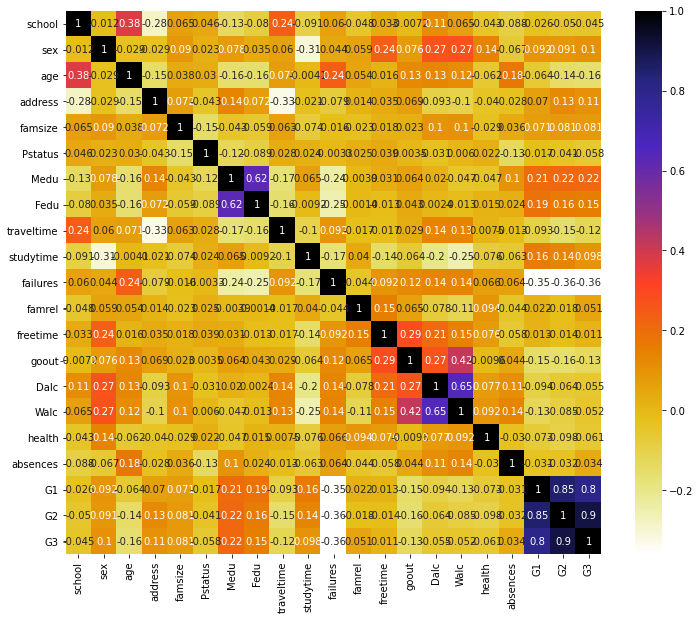

In [14]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [15]:
def correlation(df,thresold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>thresold:#getting absolute coefficient value
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [16]:
corr_features=correlation(x,0.1)
len(set(corr_features))
corr_features 

{'Dalc',
 'Fedu',
 'G1',
 'G2',
 'Walc',
 'absences',
 'failures',
 'freetime',
 'goout'}

In [17]:
df.drop(corr_features,axis=1,inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,famsup,paid,activities,nursery,higher,internet,romantic,famrel,health,G3
0,0,0,18,1,0,0,4,at_home,teacher,course,...,no,no,no,yes,yes,no,no,4,3,6
1,0,0,17,1,0,1,1,at_home,other,course,...,yes,no,no,no,yes,yes,no,5,3,6
2,0,0,15,1,1,1,1,at_home,other,other,...,no,yes,no,yes,yes,yes,no,4,3,10
3,0,0,15,1,0,1,4,health,services,home,...,yes,yes,yes,yes,yes,yes,yes,3,5,15
4,0,0,16,1,0,1,3,other,other,home,...,yes,yes,no,yes,yes,no,no,4,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,services,services,course,...,yes,yes,no,yes,yes,no,no,5,4,9
391,1,1,17,1,1,1,3,services,services,course,...,no,no,no,no,yes,yes,no,2,2,16
392,1,1,21,0,0,1,1,other,other,course,...,no,no,no,no,yes,no,no,5,3,7
393,1,1,18,0,1,1,3,services,other,course,...,no,no,no,no,yes,yes,no,4,5,10


In [18]:
cat_features = [name for name in df.columns if df[name].dtype == 'object']

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cat_features):
    df[i]=le.fit_transform(df[i])

In [20]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,famsup,paid,activities,nursery,higher,internet,romantic,famrel,health,G3
0,0,0,18,1,0,0,4,0,4,0,...,0,0,0,1,1,0,0,4,3,6
1,0,0,17,1,0,1,1,0,2,0,...,1,0,0,0,1,1,0,5,3,6
2,0,0,15,1,1,1,1,0,2,2,...,0,1,0,1,1,1,0,4,3,10
3,0,0,15,1,0,1,4,1,3,1,...,1,1,1,1,1,1,1,3,5,15
4,0,0,16,1,0,1,3,2,2,1,...,1,1,0,1,1,0,0,4,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,3,3,0,...,1,1,0,1,1,0,0,5,4,9
391,1,1,17,1,1,1,3,3,3,0,...,0,0,0,0,1,1,0,2,2,16
392,1,1,21,0,0,1,1,2,2,0,...,0,0,0,0,1,0,0,5,3,7
393,1,1,18,0,1,1,3,3,2,0,...,0,0,0,0,1,1,0,4,5,10


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,health
0,0,0,18,1,0,0,4,0,4,0,...,1,0,0,0,1,1,0,0,4,3
1,0,0,17,1,0,1,1,0,2,0,...,0,1,0,0,0,1,1,0,5,3
2,0,0,15,1,1,1,1,0,2,2,...,1,0,1,0,1,1,1,0,4,3
3,0,0,15,1,0,1,4,1,3,1,...,0,1,1,1,1,1,1,1,3,5
4,0,0,16,1,0,1,3,2,2,1,...,0,1,1,0,1,1,0,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,3,3,0,...,0,1,1,0,1,1,0,0,5,4
391,1,1,17,1,1,1,3,3,3,0,...,0,0,0,0,0,1,1,0,2,2
392,1,1,21,0,0,1,1,2,2,0,...,0,0,0,0,0,1,0,0,5,3
393,1,1,18,0,1,1,3,3,2,0,...,0,0,0,0,0,1,1,0,4,5


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [24]:
x_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,health
81,0,1,15,1,0,1,2,2,2,1,...,1,0,1,0,0,1,1,0,5,5
344,0,0,18,1,0,1,2,0,2,0,...,0,1,0,0,1,1,1,0,4,3
336,0,0,19,0,0,0,3,3,0,1,...,0,0,1,0,1,1,0,0,5,5
124,0,0,16,1,0,1,2,2,2,1,...,0,0,1,0,1,1,1,1,5,5
250,0,1,18,1,0,1,3,3,2,0,...,0,0,0,0,1,0,1,0,4,5


In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))

0.020222444254005212


In [27]:
from sklearn import metrics
print('MEAN Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MEAN Absolute Error: 4.122767295970695
Mean Squared Error: 27.73567220555196


<IPython.core.display.Javascript object>

Root Mean Squared Error: 5.266466766775611


In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs=SFS(LinearRegression(),forward=True,scoring='neg_mean_squared_error',k_features=8).fit(x,y) #forward=true for forward selection and applying mean square error on a training dataset and taking only 8 features 
                                                  
           
sfs.k_score_

-19.154029885627835

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,bootstrap=True,max_features=None,min_samples_leaf=4,max_depth=4)
rfr=rfr.fit(x_train,y_train)

In [30]:
from sklearn.metrics import r2_score
y_pred = reg.predict(x_test)
print(r2_score(y_test, y_pred))

0.020222444254005212


In [31]:
x.columns[list(sfs.k_feature_idx_)]

Index(['sex', 'address', 'Medu', 'reason', 'studytime', 'schoolsup', 'higher',
       'romantic'],
      dtype='object')

In [32]:
#applying forward selection wrapper method on a random forest Regression model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

sfs=SFS(RandomForestRegressor(),forward=True,scoring='neg_mean_squared_error',k_features=8).fit(x,y)

sfs.k_score_

-19.972175767640614